# Figure 10

Analysis of the model in which each agent $i$ has a different threshold, $\mu_i$, normally distributed around the initial threshold, $\mu$. Panel A shows the \texttt{Efficiency} with respect to $\sigma$ taking values in $\{0.01, 0.02,\ldots,0.08,0.09,0.1\}$ in a model with memory 12 and 12 predictors per agent. The right panel shows the distribution of the average score per player (\texttt{Efficiency}) in a model with memory 24, 12 predictors per player and $\sigma\,{=}\,0.08$. In panel B we show the results of sweeping the number of predictors from 1 to 12 and its influence on each of the four measures. We used a model with 24 rounds of memory and where each $\mu_i$ was sampled from a Gaussian distribution with mean $\mu$ and standard deviation $\sigma\,{=}\,0.08$. Panel C shows $\Delta m$ vs.~round for each model with $k\,{=}\,1,3,12$, memory 24 and $\sigma\,{=}\,0.08$. Panel D shows the average of the predictions vs.~round for each model with $k\,{=}\,1,3,12$, memory 24 and $\sigma\,{=}\,0.08$.

In [1]:
import PIL
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

import sys
sys.path.append('../el_farol')

from main import main_gaussian
from data_utils import IQR, Commonality
from config import PATHS

### Panel A

In [6]:
ks = [12]
ds = [24]
sds = [0.01, 0.02, 0.08, 0.09, 0.1]
num_rounds = 100
df = main_gaussian(
    ks=ks,
    ds=ds,
    sds=sds,
    num_rounds=num_rounds,
    num_experiments=10,
    seed=42
)

Running std thresholds sweeps:   0%|          | 0/5 [00:00<?, ?it/s]

Running memory sweeps:   0%|          | 0/1 [00:00<?, ?it/s]

Running predictor sweeps:   0%|          | 0/1 [00:00<?, ?it/s]

Running agent sweeps:   0%|          | 0/1 [00:00<?, ?it/s]

Running round sweeps:   0%|          | 0/1 [00:00<?, ?it/s]

Running experiments:   0%|          | 0/10 [00:00<?, ?it/s]

Running memory sweeps:   0%|          | 0/1 [00:00<?, ?it/s]

Running predictor sweeps:   0%|          | 0/1 [00:00<?, ?it/s]

Running agent sweeps:   0%|          | 0/1 [00:00<?, ?it/s]

Running round sweeps:   0%|          | 0/1 [00:00<?, ?it/s]

Running experiments:   0%|          | 0/10 [00:00<?, ?it/s]

Running memory sweeps:   0%|          | 0/1 [00:00<?, ?it/s]

Running predictor sweeps:   0%|          | 0/1 [00:00<?, ?it/s]

Running agent sweeps:   0%|          | 0/1 [00:00<?, ?it/s]

Running round sweeps:   0%|          | 0/1 [00:00<?, ?it/s]

Running experiments:   0%|          | 0/10 [00:00<?, ?it/s]

Running memory sweeps:   0%|          | 0/1 [00:00<?, ?it/s]

Running predictor sweeps:   0%|          | 0/1 [00:00<?, ?it/s]

Running agent sweeps:   0%|          | 0/1 [00:00<?, ?it/s]

Running round sweeps:   0%|          | 0/1 [00:00<?, ?it/s]

Running experiments:   0%|          | 0/10 [00:00<?, ?it/s]

Running memory sweeps:   0%|          | 0/1 [00:00<?, ?it/s]

Running predictor sweeps:   0%|          | 0/1 [00:00<?, ?it/s]

Running agent sweeps:   0%|          | 0/1 [00:00<?, ?it/s]

Running round sweeps:   0%|          | 0/1 [00:00<?, ?it/s]

Running experiments:   0%|          | 0/10 [00:00<?, ?it/s]

In [10]:
# Keep only last 20 rounds
dfE = df[df['Round'] >= int(0.9 * num_rounds)]
# Determine mean decision, score and inaccuracy per round
df2B = dfE.groupby(['Identifier', 'Round', 'Std_threshold', 'Num_predictors', 'Memory']).agg(
    Attendance=pd.NamedAgg(column="Decision", aggfunc=lambda x: np.mean(x.values)),
    Efficiency=pd.NamedAgg(column="Score", aggfunc=lambda x: np.mean(x.values)),
    Inaccuracy=pd.NamedAgg(column="Inaccuracy", aggfunc=lambda x: np.mean(x.values)),
)
# Get attendance, efficiency, inaccuracy and deviation
df2C = df2B.groupby(['Identifier', 'Std_threshold', 'Num_predictors', 'Memory']).agg(
    Attendance=pd.NamedAgg(column="Attendance", aggfunc=lambda x: np.mean(x.values)),
    Efficiency=pd.NamedAgg(column="Efficiency", aggfunc=lambda x: np.mean(x.values)),
    Inaccuracy=pd.NamedAgg(column="Inaccuracy", aggfunc=lambda x: np.mean(x.values)),
    Deviation=pd.NamedAgg(column="Attendance", aggfunc=lambda x: np.std(x.values)),
).reset_index()
# Get average score per player
df2D = pd.DataFrame(dfE[dfE['Std_threshold']==0.08]).groupby(['Identifier', 'Agent']).agg(
    Efficiency=pd.NamedAgg(column="Score", aggfunc=lambda x: np.mean(x.values)),
).reset_index()


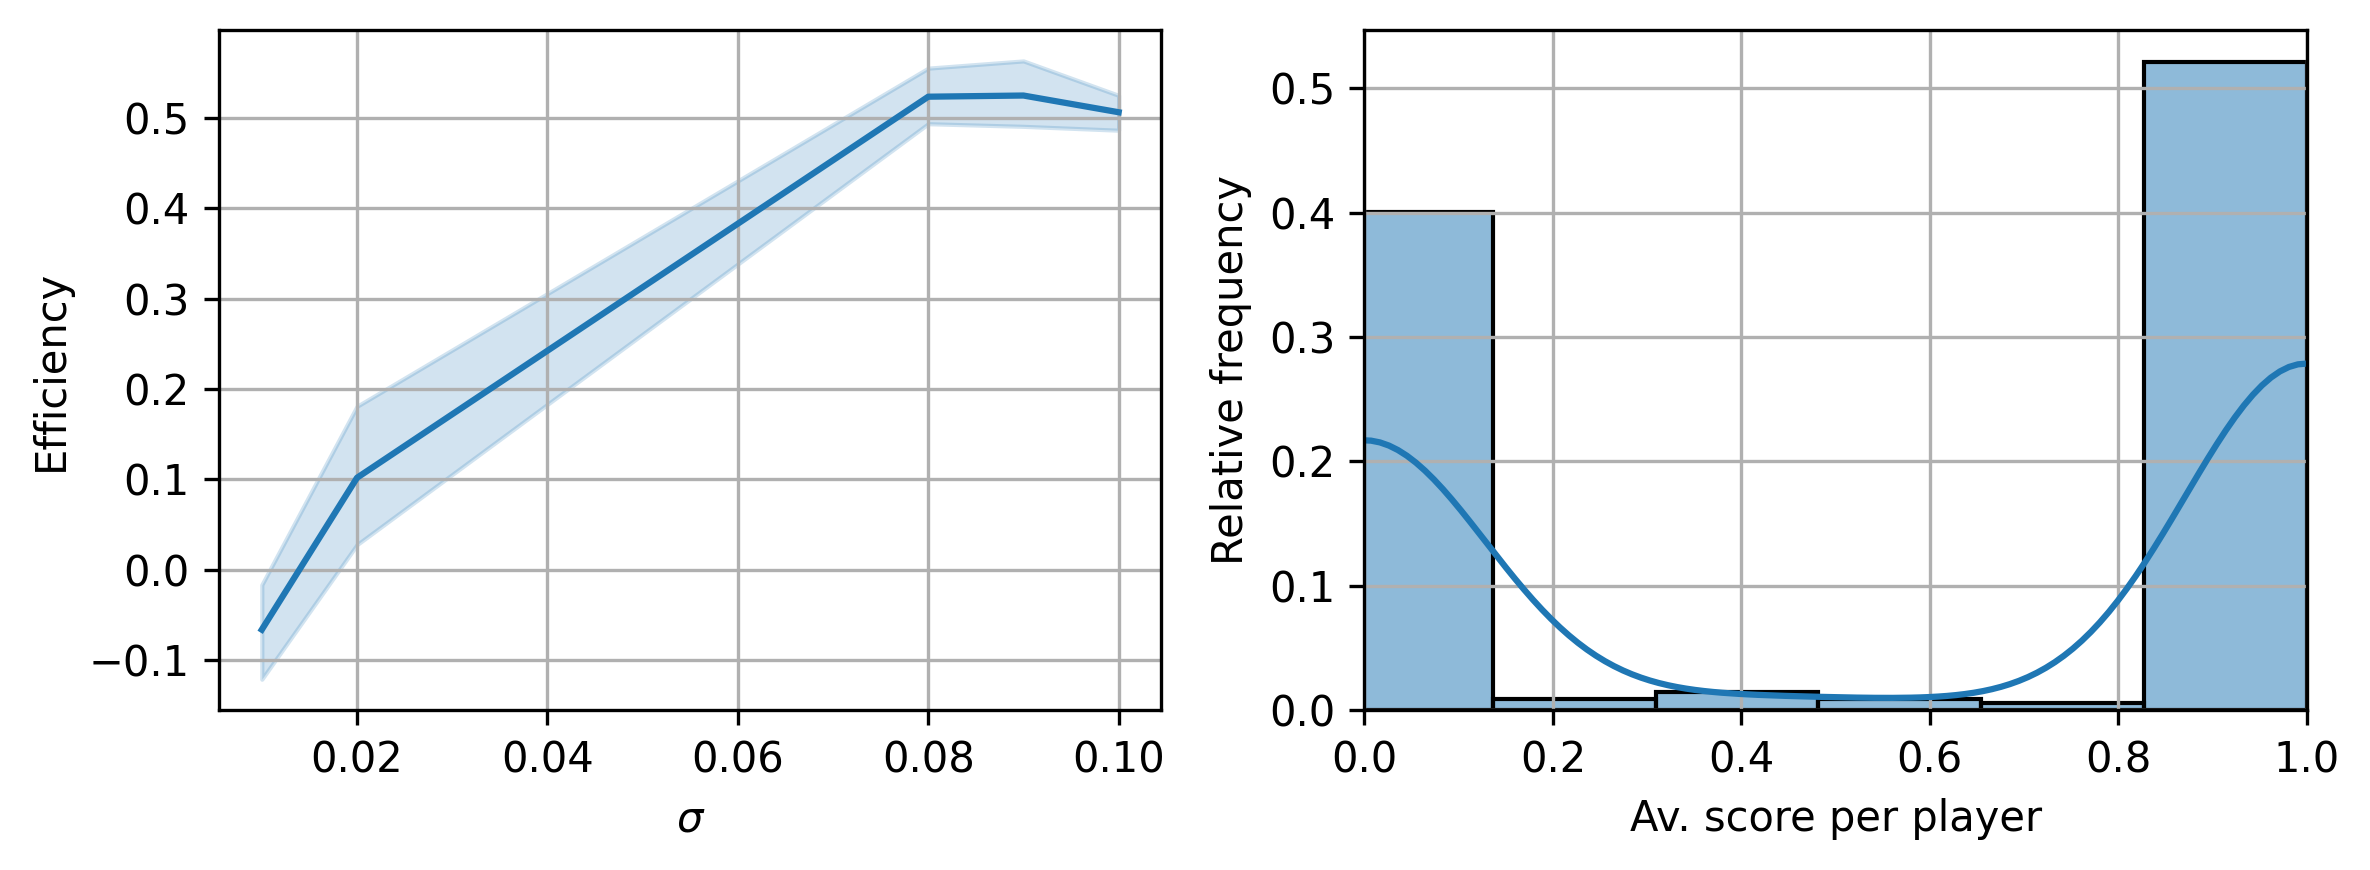

In [14]:
fig, ax = plt.subplots(
    1,2, figsize=(8,3), 
    tight_layout=True, dpi=300
)
sns.lineplot(
    x='Std_threshold', y='Efficiency',
    data=df2C, ax=ax[0]
)
ax[0].set_xlabel('$\sigma$')
ax[0].set_ylabel('Efficiency')
ax[0].grid()

sns.histplot(
    df2D['Efficiency'], 
    kde=True, ax=ax[1],
    stat='probability'
)
ax[1].set_xlim(0, 1)
ax[1].set_xlabel('Av. score per player')
ax[1].set_ylabel('Relative frequency')
ax[1].grid()

# Convert figure to image array
fig.canvas.draw()
rgba_bytes = fig.canvas.buffer_rgba().tobytes()
width, height = fig.canvas.get_width_height()
pil_image = PIL.Image.frombytes(mode="RGBA", size=[width, height], data=rgba_bytes)
first_row_array = np.array(pil_image)


### Panel B

In [15]:
ks = [1, 3, 6, 9, 12]
ds = [24]
sds = [0.08]
num_rounds = 200
df = main_gaussian(
    ks=ks,
    ds=ds,
    sds=sds,
    num_rounds=num_rounds,
    num_experiments=10,
    seed=42
)

Running std thresholds sweeps:   0%|          | 0/1 [00:00<?, ?it/s]

Running memory sweeps:   0%|          | 0/1 [00:00<?, ?it/s]

Running predictor sweeps:   0%|          | 0/5 [00:00<?, ?it/s]

Running agent sweeps:   0%|          | 0/1 [00:00<?, ?it/s]

Running round sweeps:   0%|          | 0/1 [00:00<?, ?it/s]

Running experiments:   0%|          | 0/10 [00:00<?, ?it/s]

Running agent sweeps:   0%|          | 0/1 [00:00<?, ?it/s]

Running round sweeps:   0%|          | 0/1 [00:00<?, ?it/s]

Running experiments:   0%|          | 0/10 [00:00<?, ?it/s]

Running agent sweeps:   0%|          | 0/1 [00:00<?, ?it/s]

Running round sweeps:   0%|          | 0/1 [00:00<?, ?it/s]

Running experiments:   0%|          | 0/10 [00:00<?, ?it/s]

Running agent sweeps:   0%|          | 0/1 [00:00<?, ?it/s]

Running round sweeps:   0%|          | 0/1 [00:00<?, ?it/s]

Running experiments:   0%|          | 0/10 [00:00<?, ?it/s]

Running agent sweeps:   0%|          | 0/1 [00:00<?, ?it/s]

Running round sweeps:   0%|          | 0/1 [00:00<?, ?it/s]

Running experiments:   0%|          | 0/10 [00:00<?, ?it/s]

In [16]:
# Keep only last 20 rounds
dfE = df[df['Round'] >= int(0.9 * num_rounds)]
# Determine mean decision, score and inaccuracy per round
df2B = dfE.groupby(['Identifier', 'Round', 'Num_predictors', 'Memory']).agg(
    Attendance=pd.NamedAgg(column="Decision", aggfunc=lambda x: np.mean(x.values)),
    Efficiency=pd.NamedAgg(column="Score", aggfunc=lambda x: np.mean(x.values)),
    Inaccuracy=pd.NamedAgg(column="Inaccuracy", aggfunc=lambda x: np.mean(x.values)),
)
# Get attendance, efficiency, inaccuracy and deviation
df2C = df2B.groupby(['Identifier', 'Num_predictors', 'Memory']).agg(
    Attendance=pd.NamedAgg(column="Attendance", aggfunc=lambda x: np.mean(x.values)),
    Efficiency=pd.NamedAgg(column="Efficiency", aggfunc=lambda x: np.mean(x.values)),
    Inaccuracy=pd.NamedAgg(column="Inaccuracy", aggfunc=lambda x: np.mean(x.values)),
    Deviation=pd.NamedAgg(column="Attendance", aggfunc=lambda x: np.std(x.values)),
)

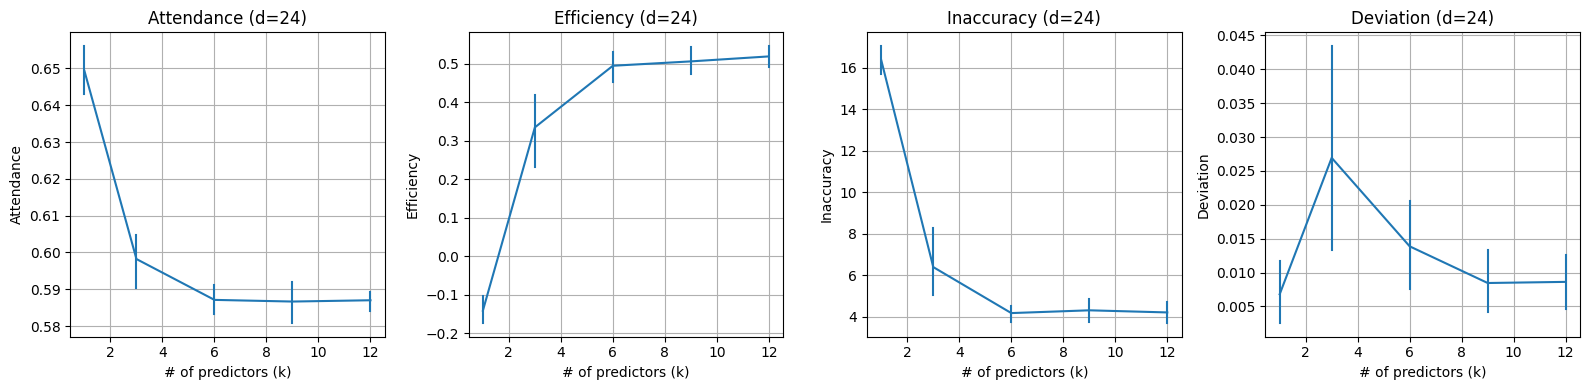

In [17]:
fig, ax = plt.subplots(
    1,4, 
    figsize=(16, 4), 
    tight_layout=True
)

variables = ['Attendance', 'Efficiency', 'Inaccuracy', 'Deviation']
d = ds[0]

for i, v in enumerate(variables):
    sns.lineplot(
        x='Num_predictors', y=v,
        data=df2C,
        ax=ax[i],
        err_style="bars",ci=95
    )
    ax[i].set_ylabel(v)
    ax[i].set_xlabel('# of predictors (k)')
    ax[i].set_title(f"{v} (d={d})")
    ax[i].grid()

# Convert figure to image array
fig.canvas.draw()
rgba_bytes = fig.canvas.buffer_rgba().tobytes()
width, height = fig.canvas.get_width_height()
pil_image = PIL.Image.frombytes(mode="RGBA", size=[width, height], data=rgba_bytes)
second_row_array = np.array(pil_image)

### Panel C

In [18]:
ks = [1, 3, 12]
ds = [24]
sds = [0.08]
num_rounds = 200
df = main_gaussian(
    ks=ks,
    ds=ds,
    sds=sds,
    num_rounds=num_rounds,
    num_experiments=10,
    seed=42
)

Running std thresholds sweeps:   0%|          | 0/1 [00:00<?, ?it/s]

Running memory sweeps:   0%|          | 0/1 [00:00<?, ?it/s]

Running predictor sweeps:   0%|          | 0/3 [00:00<?, ?it/s]

Running agent sweeps:   0%|          | 0/1 [00:00<?, ?it/s]

Running round sweeps:   0%|          | 0/1 [00:00<?, ?it/s]

Running experiments:   0%|          | 0/10 [00:00<?, ?it/s]

Running agent sweeps:   0%|          | 0/1 [00:00<?, ?it/s]

Running round sweeps:   0%|          | 0/1 [00:00<?, ?it/s]

Running experiments:   0%|          | 0/10 [00:00<?, ?it/s]

Running agent sweeps:   0%|          | 0/1 [00:00<?, ?it/s]

Running round sweeps:   0%|          | 0/1 [00:00<?, ?it/s]

Running experiments:   0%|          | 0/10 [00:00<?, ?it/s]

In [19]:
df2B = df.groupby(['Identifier', 'Round', 'Num_predictors', 'Memory']).agg(
    IQR=pd.NamedAgg(column="Prediction", aggfunc=lambda x: IQR(x.values)),
    Commonality=pd.NamedAgg(column="Decision", aggfunc=lambda x: Commonality(x.values)),
).reset_index()

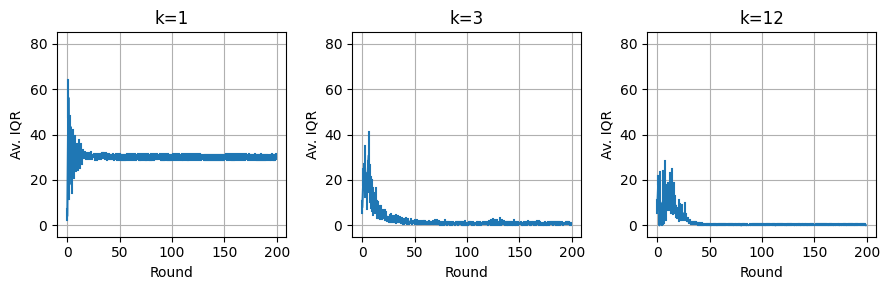

In [20]:
fig, ax = plt.subplots(
    1,3, 
    figsize=(9, 3), 
    tight_layout=True,
)

for i, k in enumerate(ks):
    df2C = df2B[df2B['Num_predictors'] == k].reset_index()
    sns.lineplot(
        x='Round', y='IQR',
        data=df2C,
        ax=ax[i],
        err_style="bars",ci=95
    )
    ax[i].set_ylabel('Av. IQR')
    ax[i].set_xlabel('Round')
    ax[i].set_title(f"k={k}")
    ax[i].grid()
    ax[i].set_ylim(-5, 85)

# Convert figure to image array
fig.canvas.draw()
rgba_bytes = fig.canvas.buffer_rgba().tobytes()
width, height = fig.canvas.get_width_height()
pil_image = PIL.Image.frombytes(mode="RGBA", size=[width, height], data=rgba_bytes)
third_row_array = np.array(pil_image)

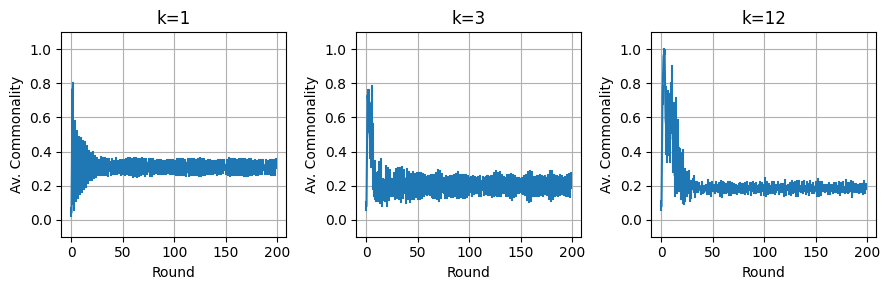

In [21]:
fig, ax = plt.subplots(
    1,3, 
    figsize=(9, 3), 
    tight_layout=True,
)

for i, k in enumerate(ks):
    df2C = df2B[df2B['Num_predictors'] == k].reset_index()
    sns.lineplot(
        x='Round', y='Commonality',
        data=df2C,
        ax=ax[i],
        err_style="bars",ci=95
    )
    ax[i].set_ylabel('Av. Commonality')
    ax[i].set_xlabel('Round')
    ax[i].set_title(f"k={k}")
    ax[i].grid()
    ax[i].set_ylim(-0.1, 1.1)

# Convert figure to image array
fig.canvas.draw()
rgba_bytes = fig.canvas.buffer_rgba().tobytes()
width, height = fig.canvas.get_width_height()
pil_image = PIL.Image.frombytes(mode="RGBA", size=[width, height], data=rgba_bytes)
fourth_row_array = np.array(pil_image)

### Panel D

In [22]:
ks = [1, 3, 12]
ds = [24]
sds = [0.08]
num_rounds = 100
df = main_gaussian(
    ks=ks,
    ds=ds,
    sds=sds,
    num_rounds=num_rounds,
    num_experiments=1,
    seed=42
)

Running std thresholds sweeps:   0%|          | 0/1 [00:00<?, ?it/s]

Running memory sweeps:   0%|          | 0/1 [00:00<?, ?it/s]

Running predictor sweeps:   0%|          | 0/3 [00:00<?, ?it/s]

Running agent sweeps:   0%|          | 0/1 [00:00<?, ?it/s]

Running round sweeps:   0%|          | 0/1 [00:00<?, ?it/s]

Running experiments:   0%|          | 0/1 [00:00<?, ?it/s]

Running agent sweeps:   0%|          | 0/1 [00:00<?, ?it/s]

Running round sweeps:   0%|          | 0/1 [00:00<?, ?it/s]

Running experiments:   0%|          | 0/1 [00:00<?, ?it/s]

Running agent sweeps:   0%|          | 0/1 [00:00<?, ?it/s]

Running round sweeps:   0%|          | 0/1 [00:00<?, ?it/s]

Running experiments:   0%|          | 0/1 [00:00<?, ?it/s]

In [23]:
df2B = df.groupby(['Identifier', 'Round', 'Num_predictors', 'Memory']).agg(
        Prediction=pd.NamedAgg(column="Prediction", aggfunc=lambda x: np.mean(x.values))
).reset_index()

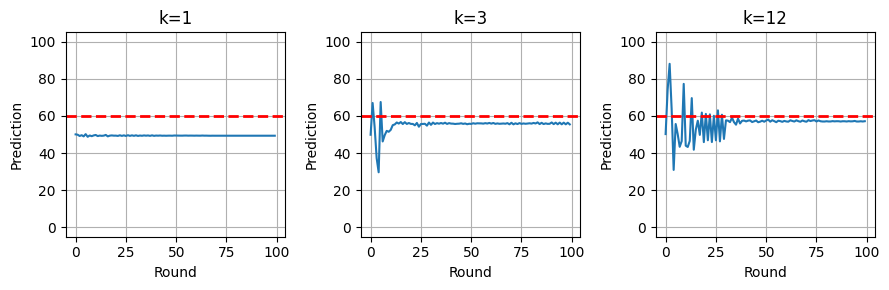

In [24]:
fig, ax = plt.subplots(
    1,3, 
    figsize=(9, 3), 
    tight_layout=True,
)

for i, k in enumerate(ks):
    df2C = df2B[df2B['Num_predictors'] == k].reset_index()
    sns.lineplot(
        x='Round', y='Prediction',
        data=df2C,
        ax=ax[i],
        err_style="bars",ci=95
    )
    ax[i].set_ylabel('Prediction')
    ax[i].set_xlabel('Round')
    ax[i].set_title(f"k={k}")
    ax[i].grid()
    ax[i].set_ylim(-5, 105)
    ax[i].axhline(60, ls='--', color='red', linewidth=2)

# Convert figure to image array
fig.canvas.draw()
rgba_bytes = fig.canvas.buffer_rgba().tobytes()
width, height = fig.canvas.get_width_height()
pil_image = PIL.Image.frombytes(mode="RGBA", size=[width, height], data=rgba_bytes)
fifth_row_array = np.array(pil_image)

### All in one figure

(-0.5, 899.5, 299.5, -0.5)

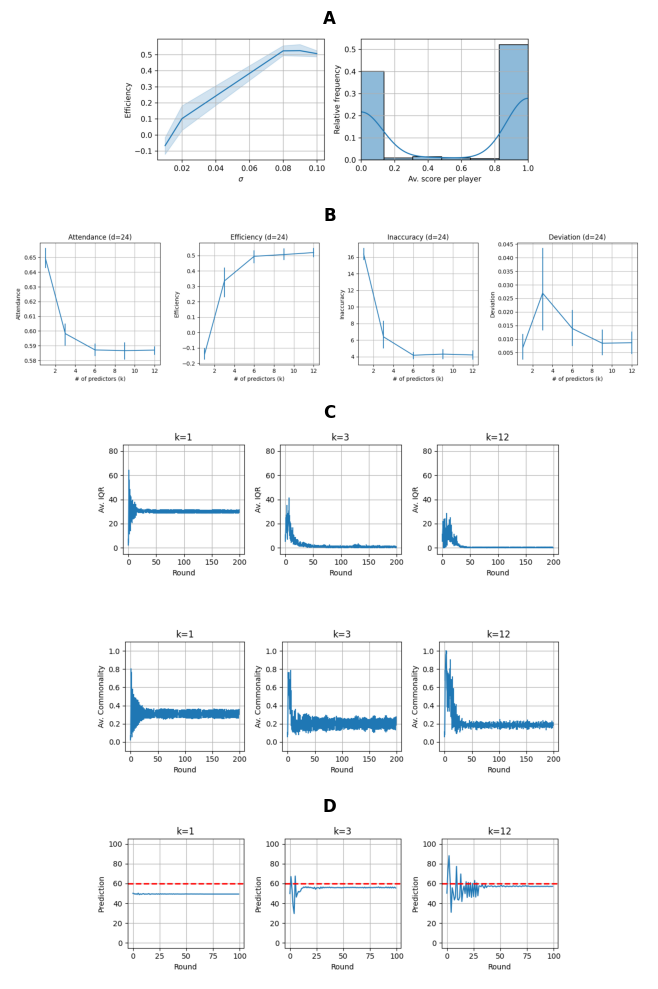

In [25]:
fig, ax = plt.subplots(5, 1, figsize=(8,10), tight_layout=True)

ax[0].imshow(first_row_array)
ax[1].imshow(second_row_array)
ax[2].imshow(third_row_array)
ax[3].imshow(fourth_row_array)
ax[4].imshow(fifth_row_array)

ax[0].set_title('A', fontweight="bold")
ax[1].set_title('B', fontweight="bold")
ax[2].set_title('C', fontweight="bold")
ax[3].set_title('', fontweight="bold")
ax[4].set_title('D', fontweight="bold")

ax[0].axis('off')
ax[1].axis('off')
ax[2].axis('off')
ax[3].axis('off')
ax[4].axis('off')

In [26]:
file_name = PATHS['folder_figures_for_paper'] / 'Figure10.png'
fig.savefig(file_name, dpi=300, bbox_inches='tight')

---